## Packages

In [3]:
import sys
sys.path.append("../")
import numpy as np
import pickle
import matplotlib.pyplot as plt
from SR_functions import Parameters
from twobox import TwoBox
from parameters import D1_ND
import pickle
_, L, m, c = Parameters()

## Import data

In [174]:
## Ilic: I = 10e9, h=1e-4
# (0) y0 = -5% L
# (1) 1st damping eigenvector

runID = 1
I_string = "10G"
pkl_fname = f'./Data/Second_Dynamics_run{runID}_I{I_string}.pkl'
Envelope = True # For eigenvector initial conditions 

## Import data - stability

In [189]:
runID=1
I_string = "10G"
pkl_fname = f'./Data/Linearised/Second_Dynamics_run{runID}_I{I_string}_fail.pkl'

In [190]:
with open(pkl_fname, 'rb') as data_file:
    data = pickle.load(data_file)

timeL = data['timeL']
timeM = data['timeM']

YL = data['YL']
x = YL[0]
y = YL[1]
vx = YL[2]
vy = YL[3]
phiM = data['phiM']
phidotM = data['phidot']

eps = data['eps']
epsdot = data['epsdot']

## Build grating (for linear model)

In [185]:
grating_type = "Optimised"

if grating_type=="Ilic":
    ## Ilic
    wavelength      = 1.5 / D1_ND(5.3/100)
    grating_pitch   = 1.8 / wavelength
    grating_depth   = 0.5 / wavelength
    box1_width      = 0.15 * grating_pitch
    box2_width      = 0.35 * grating_pitch
    box_centre_dist = 0.60 * grating_pitch
    box1_eps        = 3.5**2 
    box2_eps        = 3.5**2
    gaussian_width  = 2 * 10
    substrate_depth = 0.5 / wavelength
    substrate_eps   = 1.45**2
if grating_type=="Optimised":
    ## Optimised - second
    grating_pitch   = 1.5384469388251338
    grating_depth   = 0.5580762361523982
    box1_width      = 0.10227122552871484
    box2_width      = 0.07605954942866577
    box_centre_dist = 0.2669020979549422
    box1_eps        = 9.614975107945112
    box2_eps        = 9.382304398409568
    gaussian_width  = 33.916288616522735
    substrate_depth = 0.17299998450776535
    substrate_eps   = 9.423032644325023

wavelength      = 1.
angle           = 0.
Nx              = 100
numG            = 25
Qabs            = np.inf

grating = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs)

In [186]:
# data['Stopped']
# data['duration (min)']
# 100*vx[-1]/c
# timeL[-1]
x0_dyn = data['Initial']
h = data['step']
# I_dyn = data['Intensity']
I_dyn = 10e9

In [193]:
## Truncate
t_start = 0
t_end = 0.1# timeL[-1]
x_trunc = x[(timeL>t_start) & (timeL<t_end)]
y_trunc = y[(timeL>t_start) & (timeL<t_end)]
vx_trunc = vx[(timeL>t_start) & (timeL<t_end)]
vy_trunc = vy[(timeL>t_start) & (timeL<t_end)]
phiM_trunc = phiM[(timeM>t_start) & (timeM<t_end)]
phidotM_trunc = phidotM[(timeM>t_start) & (timeM<t_end)]

timeMeps=timeM[0:-1]
timeM_trunc = timeM[(timeM>t_start) & (timeM<t_end)]
timeMeps_trunc = timeMeps[(timeMeps>t_start) & (timeMeps<t_end)]

eps_trunc = eps[(timeMeps>t_start) & (timeMeps<t_end)]
epsdot_trunc = epsdot[(timeMeps>t_start) & (timeMeps<t_end)]

timeL_trunc = timeL[(timeL>t_start) & (timeL<t_end)]

In [11]:
## Colors

colorX="black"   
colorvX="xkcd:pine green"

colorY="blue"
colorvY="dodgerblue"  #cornflowerblue

colorphi="red"  #"royalblue"
colorvphi="tomato"  #coral

colorRotate="darkgreen"
colorRotateRate="seagreen"

In [ ]:
fig, ( (ax1a, dummy, ax1b), (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=3, ncols=3, width_ratios=(1,0.05,1), figsize=(15,15))
dummy.axis('off')
dummy2.axis('off')
dummy3.axis('off')

fig.suptitle(rf"Dynamics vs linear (dotted black): {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0_dyn[0]:.4f}, {x0_dyn[1]:.4f}, {x0_dyn[2]:.4f}, {x0_dyn[3]:.4f}, {x0_dyn[4]:.4f}, {x0_dyn[5]:.4f}]",
             y=0.95)

############
ax1a.plot(timeL_trunc, x_trunc, color=colorX)
ax1a.set_xlim(0,timeL_trunc[-1])
ax1b.plot(timeL_trunc, 100*vx_trunc/c, color=colorvX)
ax1b.set_xlim(0,timeL_trunc[-1])

ax1a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$x$ (m)")
ax1b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_x (\% c)$")

############
ax2a.plot(timeL_trunc, (y_trunc/L)*100, color=colorY)
ax2a.set_xlim(0,timeL_trunc[-1])
ax2b.plot(timeL_trunc, vy_trunc, color=colorvY)
ax2b.set_xlim(0,timeL_trunc[-1])
# ax2b.plot(timeL, np.gradient(y,timeL), color="red", linestyle="dotted")
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

## Linear
ax2a.plot(t_array, (y_lin/L)*100, color='black', linestyle='dotted')
ax2b.plot(t_array, vy_lin, color='black', linestyle='dotted')

############
ax3a.plot(timeM_trunc, (180/np.pi)*phiM_trunc, color=colorphi)
ax3a.set_xlim(0,timeL_trunc[-1])
ax3b.plot(timeM_trunc, (0.5/np.pi)*phidotM_trunc, color=colorvphi)
ax3b.set_xlim(0,timeL_trunc[-1])
# ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

## Linear
ax3a.plot(t_array, (180/np.pi)*phi_lin, color='black', linestyle='dotted')
ax3a.set_xlim(0,t_array[-1])
ax3b.plot(t_array, (0.5/np.pi)*vphi_lin, color='black', linestyle='dotted')
ax3b.set_xlim(0,t_array[-1])

## Envelope
ax2a.plot(t_array, (y_lin_conj/L)*100, color='black')
ax2a.plot(t_array, -(y_lin_conj/L)*100, color='black')
ax2b.plot(t_array, vy_lin_conj, color='black')
ax2b.plot(t_array, -vy_lin_conj, color='black')
ax3a.plot(t_array, (180/np.pi)*phi_lin_conj, color='black')
ax3a.plot(t_array, -(180/np.pi)*phi_lin_conj, color='black')
ax3b.plot(t_array, (0.5/np.pi)*vphi_lin_conj, color='black')
ax3b.plot(t_array, -(0.5/np.pi)*vphi_lin_conj, color='black')

## Dynamics result

Text(0.5, 1.05, 'DYNAMICS: Optimised grating, I=1.0E+10, h=0.0001\nx0=[0.0, 4.25E-07, 1.66E-07, 0.0, -1.81E+00, -8.58E-01]')

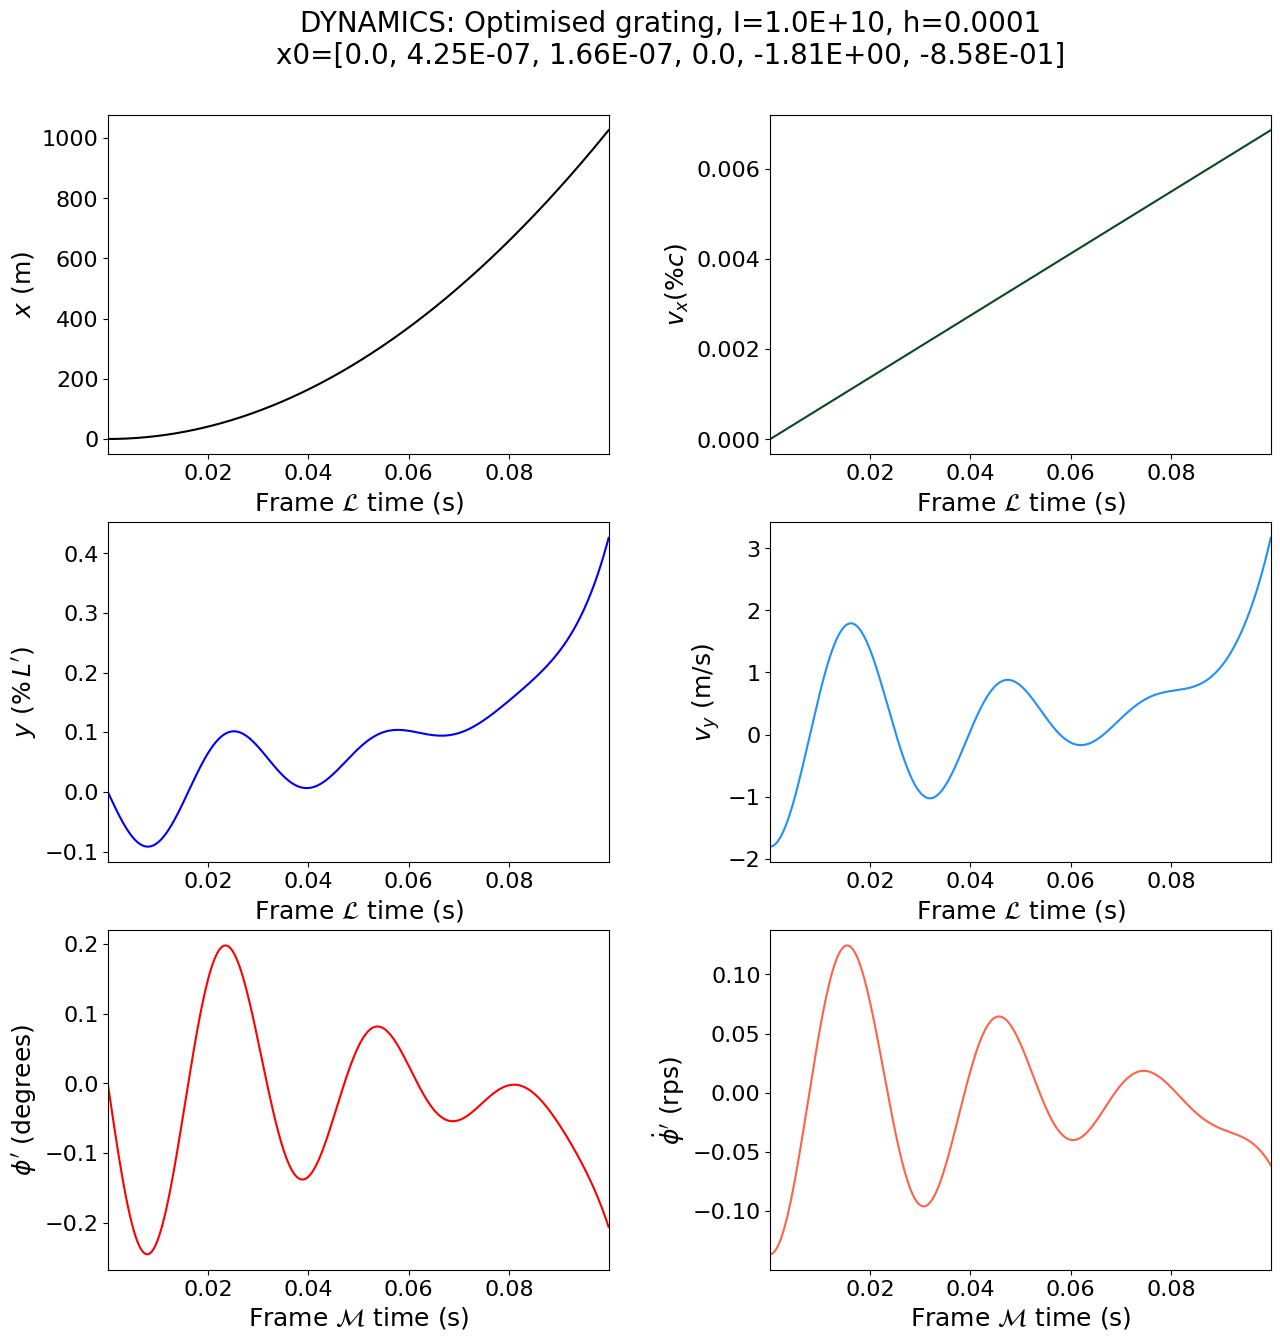

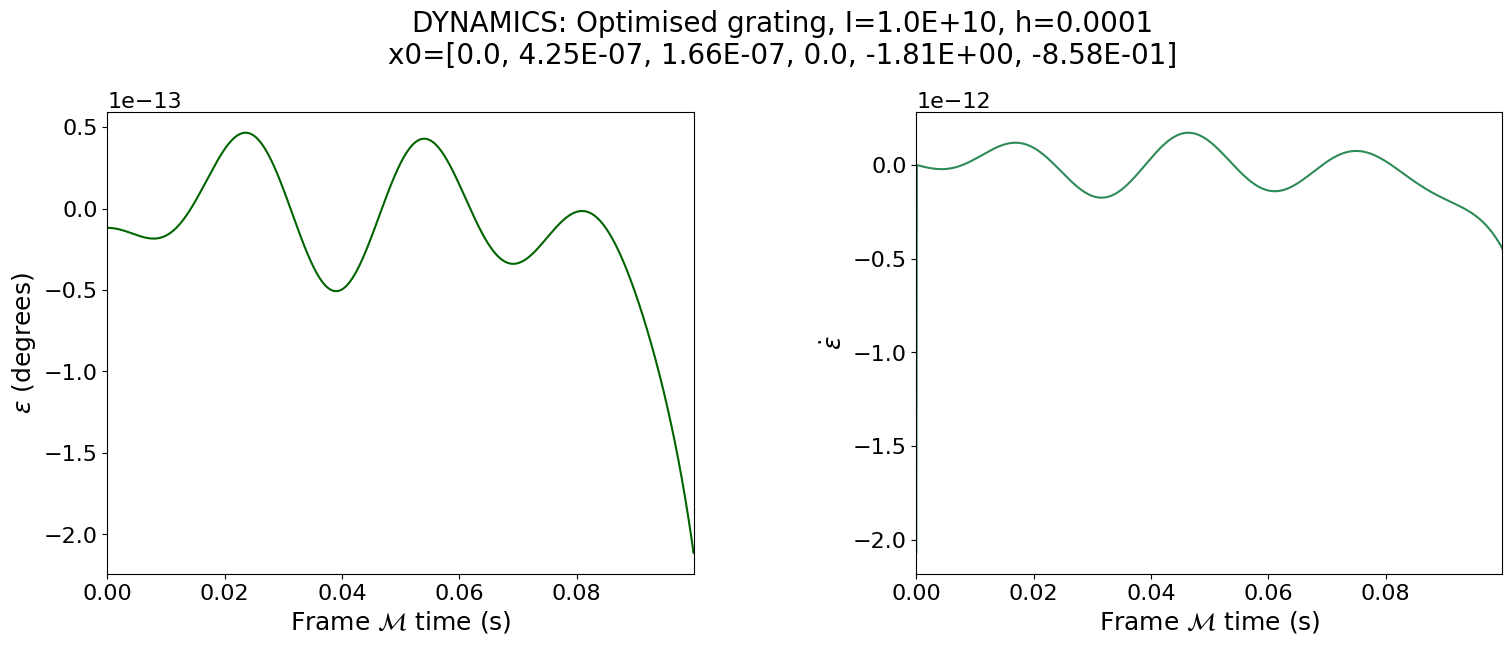

In [194]:
fig, ( (ax1a, dummy, ax1b), (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=3, ncols=3, width_ratios=(1,0.05,1), figsize=(15,15))
dummy.axis('off')
dummy2.axis('off')
dummy3.axis('off')

############
ax1a.plot(timeL_trunc, x_trunc, color=colorX)
ax1a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax1b.plot(timeL_trunc, 100*vx_trunc/c, color=colorvX)
ax1b.set_xlim(timeL_trunc[0],timeL_trunc[-1])

ax1a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$x$ (m)")
ax1b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_x (\% c)$")

############
ax2a.plot(timeL_trunc, (y_trunc/L)*100, color=colorY)
ax2a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax2b.plot(timeL_trunc, vy_trunc, color=colorvY)
ax2b.set_xlim(timeL_trunc[0],timeL_trunc[-1])
# ax2b.plot(timeL, np.gradient(y,timeL), color="red", linestyle="dotted")
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(timeM_trunc, (180/np.pi)*phiM_trunc, color=colorphi)
ax3a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax3b.plot(timeM_trunc, (0.5/np.pi)*phidotM_trunc, color=colorvphi)
ax3b.set_xlim(timeL_trunc[0],timeL_trunc[-1])
# ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

# fig.suptitle(rf"{grating_type} grating from $5.3 \%c$, runID = {runID}")
fig.suptitle(rf"DYNAMICS: {grating_type} grating, I={I_dyn:.1E}, h={h}" "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]",
             y=0.95)

fig2, (ax4a, dummy4, ax4b) = plt.subplots(nrows=1, ncols=3, width_ratios=(1,0.1,1), figsize=(18,6))
dummy4.axis('off')

ax4a.plot(timeMeps_trunc, (180/np.pi)*eps_trunc, color=colorRotate)
ax4a.set_xlim(timeMeps_trunc[0],timeMeps_trunc[-1])
ax4b.plot(timeMeps_trunc, epsdot_trunc, color=colorRotateRate)
ax4b.set_xlim(timeMeps_trunc[0],timeMeps_trunc[-1])
# ax4b.plot(timeM[0:-1], np.gradient(eps,timeM[0:-1]), color="red", linestyle="dotted")
ax4a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\\varepsilon$ (degrees)")
ax4b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\\varepsilon}$")

# fig2.suptitle(rf"{grating_type} grating from $5.3 \% c$, runID = {runID}")
fig2.suptitle(rf"DYNAMICS: {grating_type} grating, I={I_dyn:.1E}, h={h}" "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]", 
              y=1.05)

## Linear model

In [161]:
I = 10e9; m=1/1000; c = 299792458
x0 = [data['Initial'][1], data['Initial'][2], data['Initial'][4], data['Initial'][5]]
grating.wavelength = 1 #1/D1_ND(4.8/100)
real, imag, P = grating.Eigs(I, m, c, grad_method="grad",check_det=False,return_vec=True)
P_inverse = np.linalg.inv(P)
# print("Re(eig):", real*1e4)
# print("Im(eig):", imag)
vec1 = P[:,0]; vec2 = P[:,1];       vec3 = P[:,2]; vec4 = P[:,3]

## Linear model
def X_linear(t,x0):
    """
    ## Inputs
    t: time (~in M~)
    x0: 1x4 array (~in M~)
    ## Outputs
    Time evolved solution (~in M~)
    """
    sum = 0
    for i in range(4):
        sum = sum + np.matmul(P_inverse, x0)[i] * np.exp(t*(real + 1j*imag))[i] * P[:,i]
    return np.real(sum)
def X_linear_arrays(t_array,x0):
    y = np.zeros(len(t_array))
    phi = np.zeros(len(t_array))
    vy = np.zeros(len(t_array))
    vphi = np.zeros(len(t_array))
    for i in range(len(t_array)):
        X = X_linear(t_array[i],x0)
        y[i] = X[0]
        phi[i] = X[1]
        vy[i] = X[2]
        vphi[i] = X[3]
    return y, phi, vy, vphi
## Envelope in case x0 = Re(vec)
def X_linear_conj(t, real, imag, vec):
    # return 2 * np.exp(real*t)*( np.cos(imag*t)*np.real(vec) - np.sin(imag*t)*np.imag(vec) )
    return 2 * np.exp(real*t)*( np.abs(np.real(vec)) + np.abs(np.imag(vec)) )
def X_linear_conj_arrays(t_array,real, imag, vec):
    y_lin_conj = np.zeros(len(t_array))
    phi_lin_conj = np.zeros(len(t_array))
    vy_lin_conj = np.zeros(len(t_array))
    vphi_lin_conj = np.zeros(len(t_array))
    for i in range(len(t_array)):
        X = X_linear_conj(t_array[i],real, imag, vec)
        y_lin_conj[i] = X[0]
        phi_lin_conj[i] = X[1]
        vy_lin_conj[i] = X[2]
        vphi_lin_conj[i] = X[3]
    return y_lin_conj, phi_lin_conj, vy_lin_conj, vphi_lin_conj

# t_array = np.linspace(0,100,10000) 
t_array = np.linspace(timeL_trunc[0],timeL_trunc[-1],10000)

# x0 = np.array( [-(5/100)*L, 0, 1, 0] )
# x0 = np.real(vec1 + vec2)
# x0 = np.real(vec3 + vec4)

## Linear model
y_lin, phi_lin, vy_lin, vphi_lin = X_linear_arrays(t_array,x0)
## Enevelope in case
y_lin_conj, phi_lin_conj, vy_lin_conj, vphi_lin_conj = X_linear_conj_arrays(t_array, real[2], imag[2], vec3)
Envelope = True

In [120]:
print("Re(eig)",real[2])
print("vec: ", 2*np.real(vec3))

Re(eig) -0.0003064680675418166
vec:  [ 3.59070417e-07  2.97889776e-08 -1.99908332e+00 -3.63719137e-02]


In [ ]:
## Frame L time
fig, ( (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=2, ncols=3, width_ratios=(1,0.05,1), figsize=(15,10))
dummy2.axis('off')
dummy3.axis('off')

############
ax2a.plot(t_array, (y_lin/L)*100, color=colorY)
ax2b.plot(t_array, vy_lin, color=colorvY)
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(t_array, (180/np.pi)*phi_lin, color=colorphi)
ax3b.plot(t_array, (0.5/np.pi)*vphi_lin, color=colorvphi)
# ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

if Envelope:
    ax2a.plot(t_array, (y_lin_conj/L)*100, color='black') 
    ax2a.plot(t_array, -(y_lin_conj/L)*100, color='black') 
    ax2b.plot(t_array, vy_lin_conj, color='black') 
    ax2b.plot(t_array, -vy_lin_conj, color='black') 
    ax3a.plot(t_array, (180/np.pi)*phi_lin_conj, color='black')
    ax3a.plot(t_array, -(180/np.pi)*phi_lin_conj, color='black')
    ax3b.plot(t_array, (0.5/np.pi)*vphi_lin_conj, color='black')
    ax3b.plot(t_array, -(0.5/np.pi)*vphi_lin_conj, color='black')

## x bounds
ax2a.set_xlim(0,t_array[-1])
ax2b.set_xlim(0,t_array[-1])
ax3a.set_xlim(0,t_array[-1])
ax3b.set_xlim(0,t_array[-1])

if Envelope:
    fig.suptitle(rf"LINEAR: {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0[0]:.2E}, {x0[1]:.2E}, {x0[2]:.2E}, {x0[3]:.2E}]")
else:
    fig.suptitle(rf"LINEAR: {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0[0]:.4f}, {x0[1]:.4f}, {x0[2]:.4f}, {x0[3]:.4f}]")


In [ ]:
## Frame L time
fig, ( (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=2, ncols=3, width_ratios=(1,0.05,1), figsize=(15,10))
dummy2.axis('off')
dummy3.axis('off')

############
ax2a.plot(t_array, (y_lin/L)*100, color=colorY)
ax2b.plot(t_array, vy_lin, color=colorvY)
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(t_array, (180/np.pi)*phi_lin, color=colorphi)
ax3b.plot(t_array, (0.5/np.pi)*vphi_lin, color=colorvphi)
# ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

if Envelope:
    ax2a.plot(t_array, (y_lin_conj/L)*100, color='black') 
    ax2a.plot(t_array, -(y_lin_conj/L)*100, color='black') 
    ax2b.plot(t_array, vy_lin_conj, color='black') 
    ax2b.plot(t_array, -vy_lin_conj, color='black') 
    ax3a.plot(t_array, (180/np.pi)*phi_lin_conj, color='black')
    ax3a.plot(t_array, -(180/np.pi)*phi_lin_conj, color='black')
    ax3b.plot(t_array, (0.5/np.pi)*vphi_lin_conj, color='black')
    ax3b.plot(t_array, -(0.5/np.pi)*vphi_lin_conj, color='black')

## x bounds
ax2a.set_xlim(0,t_array[-1])
ax2b.set_xlim(0,t_array[-1])
ax3a.set_xlim(0,t_array[-1])
ax3b.set_xlim(0,t_array[-1])

if Envelope:
    fig.suptitle(rf"LINEAR: {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0[0]:.2E}, {x0[1]:.2E}, {x0[2]:.2E}, {x0[3]:.2E}]")
else:
    fig.suptitle(rf"LINEAR: {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0[0]:.4f}, {x0[1]:.4f}, {x0[2]:.4f}, {x0[3]:.4f}]")


In [ ]:
## Normalised time
t_factor = np.sqrt((m*c)/I)
fig, ( (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=2, ncols=3, width_ratios=(1,0.05,1), figsize=(15,10))
dummy2.axis('off')
dummy3.axis('off')

############

############
ax2a.plot(t_array/t_factor, (y_lin/L)*100, color=colorY)
ax2a.set_xlim(0,t_array[-1]/t_factor)
ax2b.plot(t_array/t_factor, vy_lin, color=colorvY)
ax2b.set_xlim(0,t_array[-1]/t_factor)
# ax2b.plot(timeL, np.gradient(y,timeL), color="red", linestyle="dotted")
ax2a.set(xlabel="Normalised frame $\mathcal{L}$ time $(\sqrt{mc/I})$", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time $(\sqrt{mc/I})$", ylabel="$v_y$ (m/s)")

############
ax3a.plot(t_array/t_factor, (180/np.pi)*phi_lin, color=colorphi)
ax3a.set_xlim(0,t_array[-1]/t_factor)
ax3b.plot(t_array/t_factor, (0.5/np.pi)*vphi_lin, color=colorvphi)
ax3b.set_xlim(0,t_array[-1]/t_factor)
# ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time $(\sqrt{mc/I})$", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time $(\sqrt{mc/I})$", ylabel="$\dot{\phi}'$ (rps)")

fig.suptitle(rf"LINEAR: {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0[0]:.4f}, {x0[1]:.4f}, {x0[2]:.4f}, {x0[3]:.4f}]")


## Overlaid

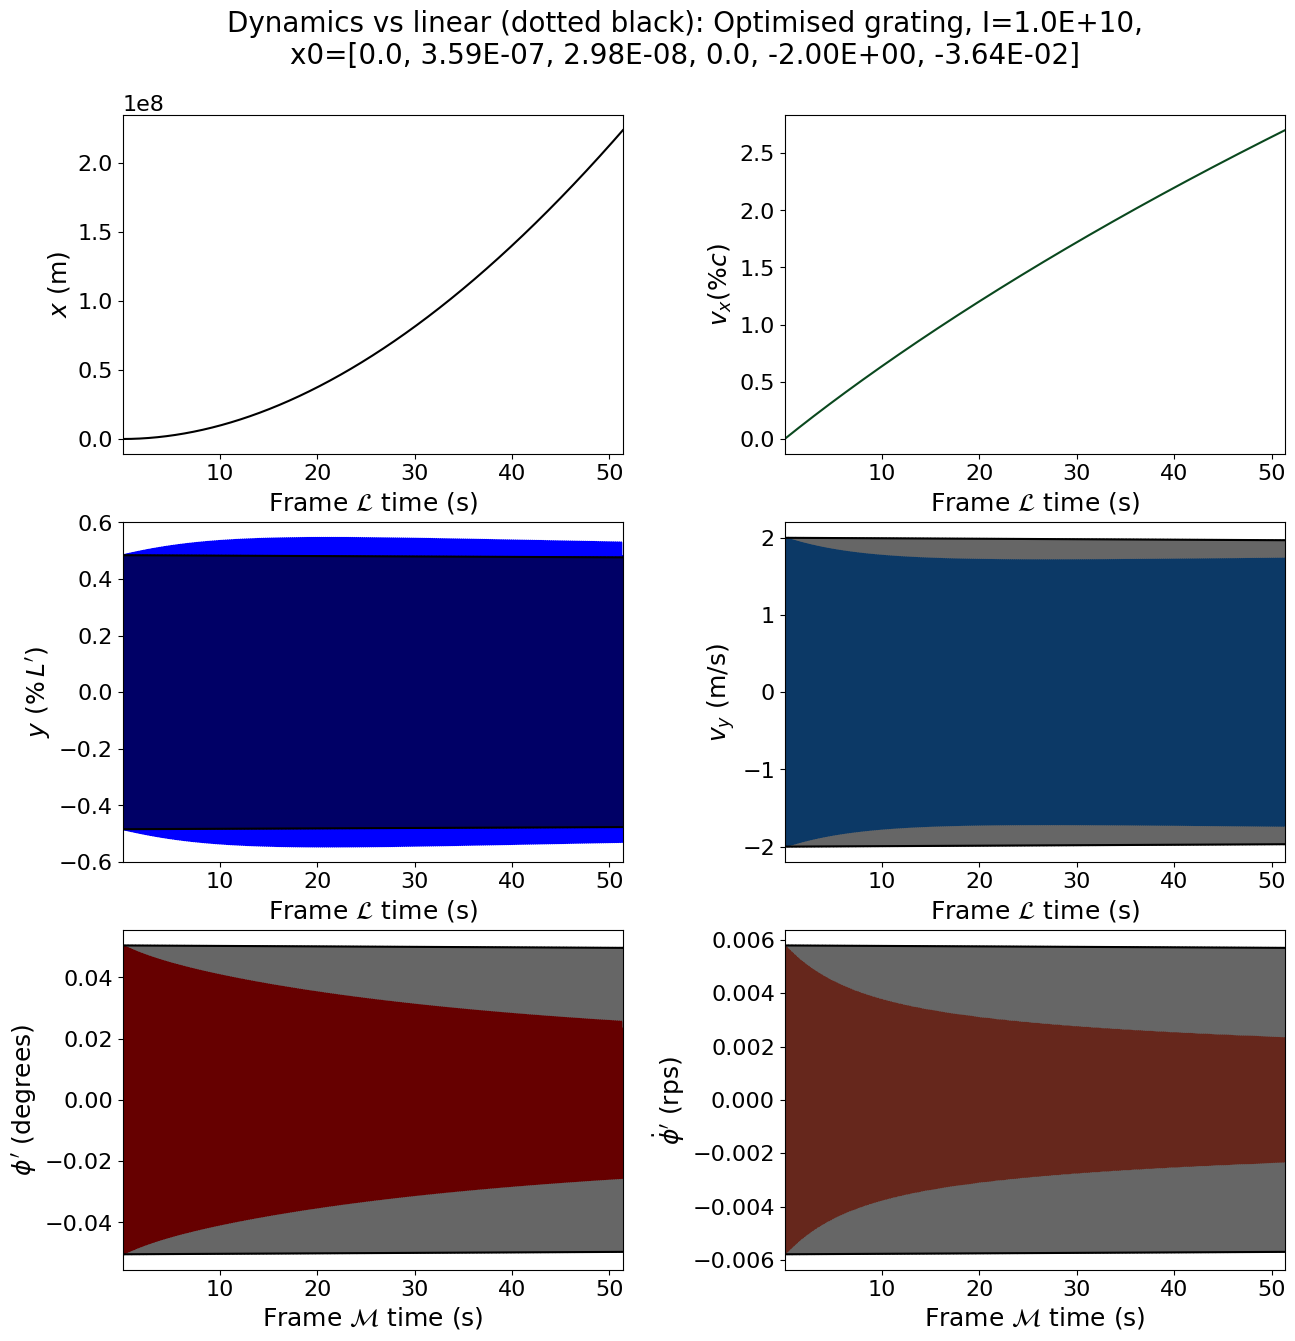

In [162]:
fig, ( (ax1a, dummy, ax1b), (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=3, ncols=3, width_ratios=(1,0.05,1), figsize=(15,15))
dummy.axis('off')
dummy2.axis('off')
dummy3.axis('off')

fig.suptitle(rf"Dynamics vs linear (dotted black): {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]",
             y=0.95)

############
ax1a.plot(timeL_trunc, x_trunc, color=colorX)
ax1a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax1b.plot(timeL_trunc, 100*vx_trunc/c, color=colorvX)
ax1b.set_xlim(timeL_trunc[0],timeL_trunc[-1])

ax1a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$x$ (m)")
ax1b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_x (\% c)$")

############
ax2a.plot(timeL_trunc, (y_trunc/L)*100, color=colorY)
ax2a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax2b.plot(timeL_trunc, vy_trunc, color=colorvY)
ax2b.set_xlim(timeL_trunc[0],timeL_trunc[-1])
# ax2b.plot(timeL, np.gradient(y,timeL), color="red", linestyle="dotted")
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

## Linear
ax2a.plot(t_array, (y_lin/L)*100, color='black', alpha=0.6)
ax2b.plot(t_array, vy_lin, color='black', alpha=0.6)

############
ax3a.plot(timeM_trunc, (180/np.pi)*phiM_trunc, color=colorphi)
ax3a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax3b.plot(timeM_trunc, (0.5/np.pi)*phidotM_trunc, color=colorvphi)
ax3b.set_xlim(timeL_trunc[0],timeL_trunc[-1])
# ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

## Linear
ax3a.plot(t_array, (180/np.pi)*phi_lin, color='black', alpha=0.6)
ax3a.set_xlim(t_array[0],t_array[-1])
ax3b.plot(t_array, (0.5/np.pi)*vphi_lin, color='black', alpha=0.6)
ax3b.set_xlim(t_array[0],t_array[-1])

## Envelope
if Envelope:
    ax2a.plot(t_array, (y_lin_conj/L)*100, color='black')
    ax2a.plot(t_array, -(y_lin_conj/L)*100, color='black')
    ax2b.plot(t_array, vy_lin_conj, color='black')
    ax2b.plot(t_array, -vy_lin_conj, color='black')
    ax3a.plot(t_array, (180/np.pi)*phi_lin_conj, color='black')
    ax3a.plot(t_array, -(180/np.pi)*phi_lin_conj, color='black')
    ax3b.plot(t_array, (0.5/np.pi)*vphi_lin_conj, color='black')
    ax3b.plot(t_array, -(0.5/np.pi)*vphi_lin_conj, color='black')

## Overlaid - eigenvector conditions

(0.0, 51.12602299084513)

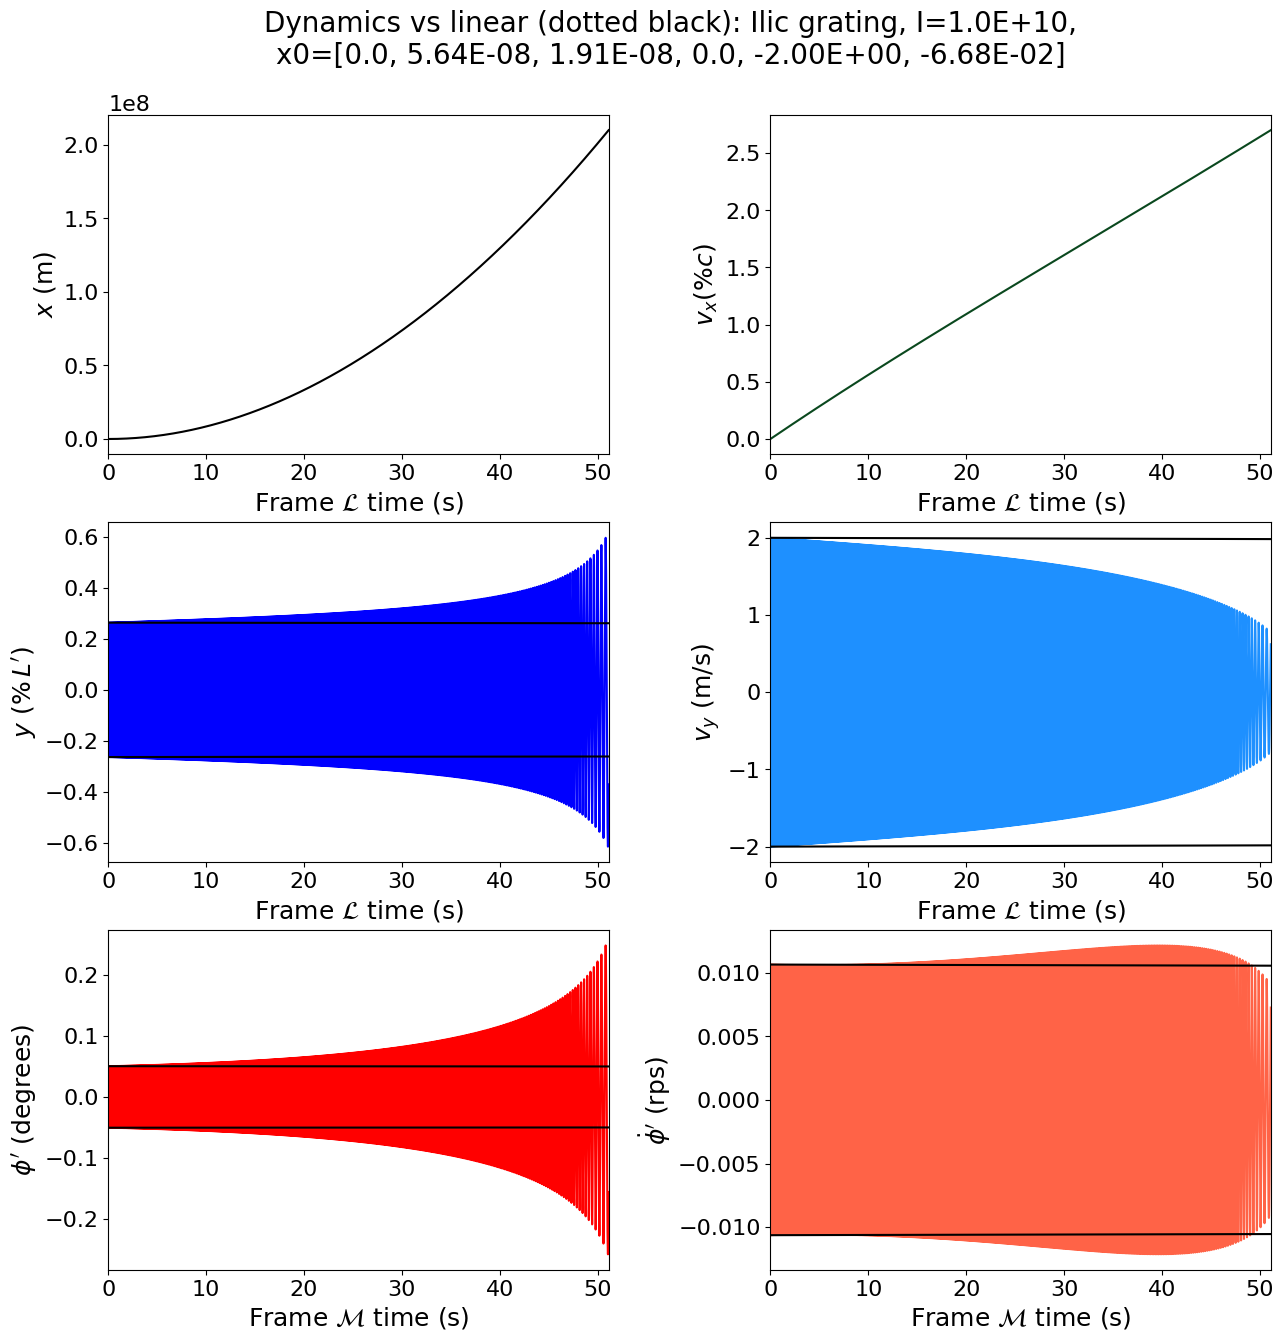

In [94]:
fig, ( (ax1a, dummy, ax1b), (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=3, ncols=3, width_ratios=(1,0.05,1), figsize=(15,15))
dummy.axis('off')
dummy2.axis('off')
dummy3.axis('off')
fig.suptitle(rf"Dynamics vs linear (dotted black): {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]",
             y=0.95)

############
ax1a.plot(timeL_trunc, x_trunc, color=colorX)
ax1b.plot(timeL_trunc, 100*vx_trunc/c, color=colorvX)
ax1a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$x$ (m)")
ax1b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_x (\% c)$")

############
ax2a.plot(timeL_trunc, (y_trunc/L)*100, color=colorY)
ax2b.plot(timeL_trunc, vy_trunc, color=colorvY)
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(timeM_trunc, (180/np.pi)*phiM_trunc, color=colorphi)
ax3b.plot(timeM_trunc, (0.5/np.pi)*phidotM_trunc, color=colorvphi)
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

## Envelope
ax2a.plot(t_array, (y_lin_conj/L)*100, color='black')
ax2a.plot(t_array, -(y_lin_conj/L)*100, color='black')
ax2b.plot(t_array, vy_lin_conj, color='black')
ax2b.plot(t_array, -vy_lin_conj, color='black')
ax3a.plot(t_array, (180/np.pi)*phi_lin_conj, color='black')
ax3a.plot(t_array, -(180/np.pi)*phi_lin_conj, color='black')
ax3b.plot(t_array, (0.5/np.pi)*vphi_lin_conj, color='black')
ax3b.plot(t_array, -(0.5/np.pi)*vphi_lin_conj, color='black')

## x-bounds
ax1a.set_xlim(0,timeL_trunc[-1])
ax1b.set_xlim(0,timeL_trunc[-1])
ax2a.set_xlim(0,timeL_trunc[-1])
ax2b.set_xlim(0,timeL_trunc[-1])
ax3a.set_xlim(0,timeL_trunc[-1])
ax3b.set_xlim(0,timeL_trunc[-1])